In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('C:/Users/Dell/Documents/prodigy ML task 2/Mall_Customers.csv')  # Ensure the CSV is downloaded from the Kaggle link and in your working directory

# Display first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Check for missing values
print(df.isnull().sum())

# Rename columns for ease
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

# Selecting features for clustering
X = df[['Income', 'Score']]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

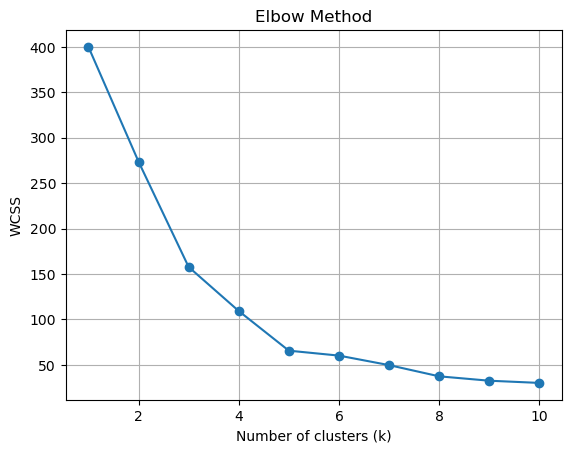

In [6]:
# Finding Optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
#apply k-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = y_kmeans

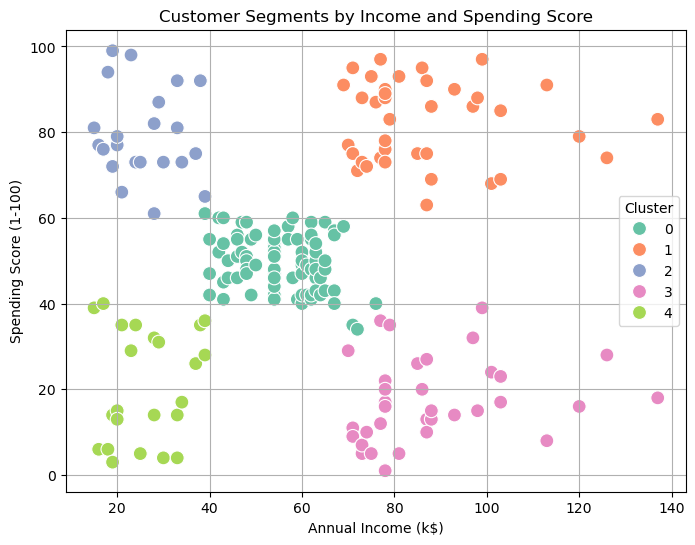

In [8]:
#visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Score', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [9]:
#analyze cluster characteristics
cluster_summary = df.groupby('Cluster')[['Income', 'Score']].mean()
print(cluster_summary)

            Income      Score
Cluster                      
0        55.296296  49.518519
1        86.538462  82.128205
2        25.727273  79.363636
3        88.200000  17.114286
4        26.304348  20.913043
